In [1]:
import os

try:
    os.mkdir("../PLOTS/NF_AVG")
except:
    print("NF_AVG dir exists.")

desired_file_output = "./NF_AVG/"

NF_AVG dir exists.


## Clear Golbal Array

In [2]:
try:
    del global_y_soc1
    del global_soc1_empty
    print("deleted")
except:
    print("not found")
    

not found


## Plot the ALL averaged soc level1 response

SOC_all.csv
global_y_soc1 not found....defining
global_soc1_empty not found....defining
NF_GENDER_F_all.csv
NF_GENDER_M_all.csv
NF_GENDER_NR_all.csv
dict_keys(['NF_GENDER_F', 'NF_GENDER_M', 'NF_GENDER_NR'])
['00', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55']
NF_GENDER_F [0.03186545 0.01239274 0.00214587 0.00108275 0.00268724 0.02325112
 0.00247687 0.07075756 0.00524265 0.11200592 0.12578156 0.03373361
 0.10521208 0.07524004 0.05146999 0.08028634 0.10105779 0.00771671
 0.00497617 0.00735766 0.06000017 0.0832597  0.        ]
 
NF_GENDER_M [0.01625218 0.00344145 0.00229609 0.00441626 0.00192269 0.00522231
 0.00029262 0.00765664 0.00630842 0.01875831 0.01132249 0.09813243
 0.04746936 0.06973555 0.00954522 0.03305908 0.04587879 0.01701874
 0.12254032 0.13276951 0.11597697 0.22998458 0.        ]
 
NF_GENDER_NR [0.00571895 0.00054466 0.         0.         0.         0.00490196
 0.         0.00490196 0

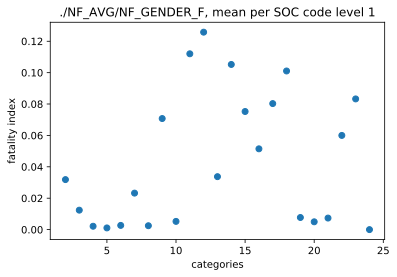

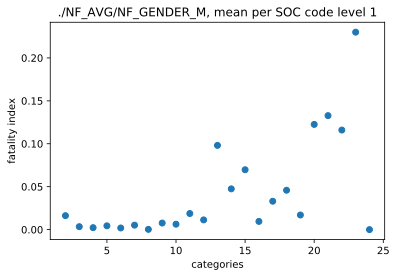

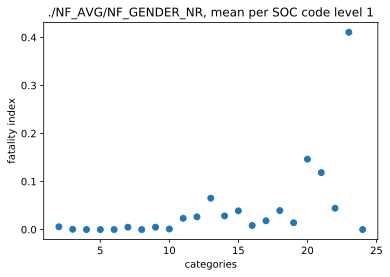

[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])]]
['NF_GEN

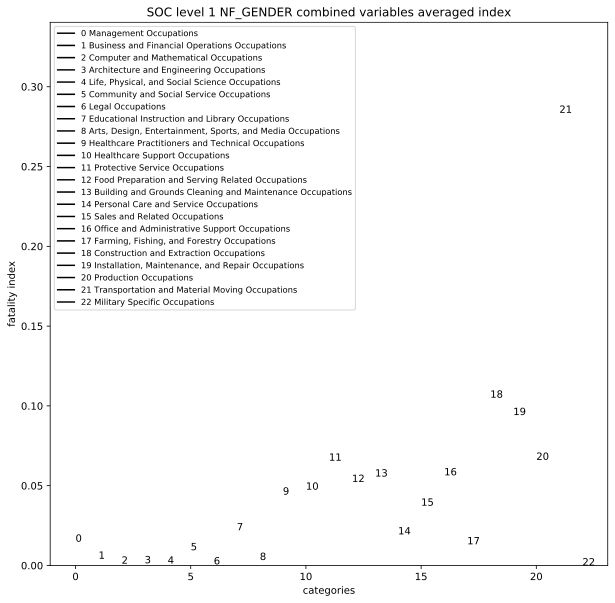

3
[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])]]
    NF

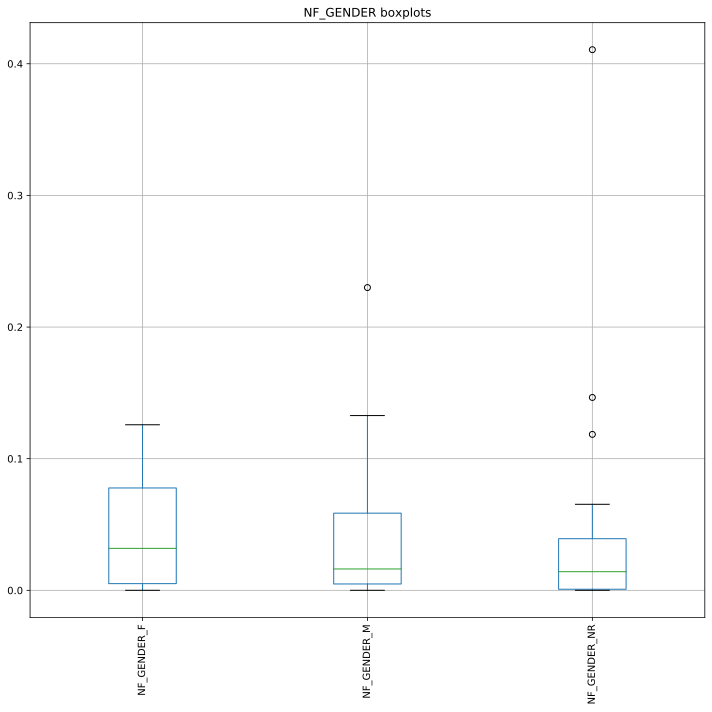

SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_AGE_14to15_all.csv
NF_AGE_16to19_all.csv
NF_AGE_20to24_all.csv
NF_AGE_25to34_all.csv
NF_AGE_35to44_all.csv
NF_AGE_45to54_all.csv
NF_AGE_55to64_all.csv
NF_AGE_65plus_all.csv
NF_AGE_NR_all.csv
dict_keys(['NF_AGE_14to15', 'NF_AGE_16to19', 'NF_AGE_20to24', 'NF_AGE_25to34', 'NF_AGE_35to44', 'NF_AGE_45to54', 'NF_AGE_55to64', 'NF_AGE_65plus', 'NF_AGE_NR'])
['00', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55']
NF_AGE_14to15 [0.         0.         0.         0.         0.         0.
 0.         0.         0.01481481 0.         0.         0.0962963
 0.4962963  0.08888889 0.14814815 0.         0.01481481 0.05185185
 0.         0.         0.01481481 0.07407407 0.        ]
 
NF_AGE_16to19 [3.39567443e-03 9.92581757e-04 3.13446871e-04 1.04482290e-04
 2.40309268e-03 2.45533382e-03 0.00000000e+00 1.20154634e-02
 9.19444154e-03 1.02915056e-02 4.94201233

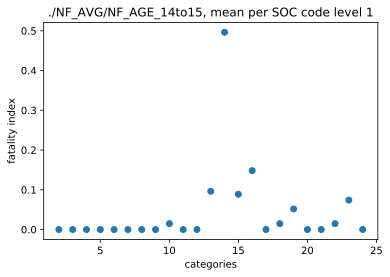

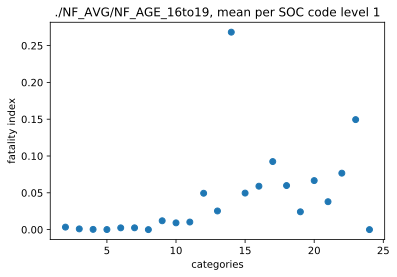

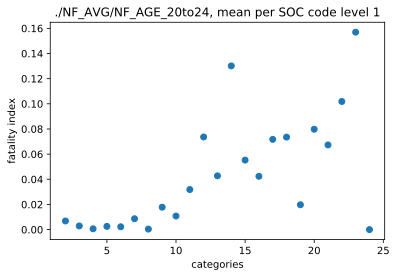

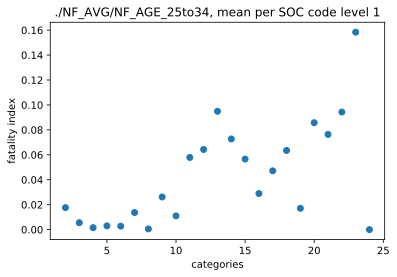

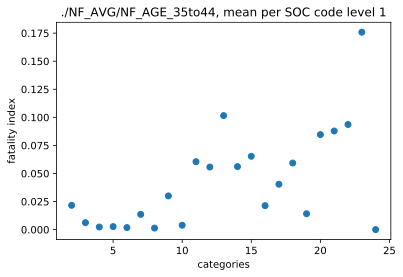

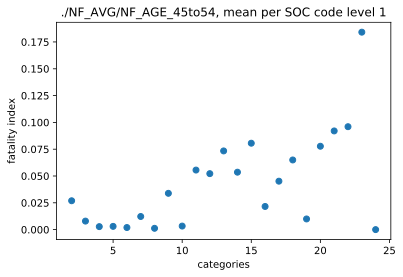

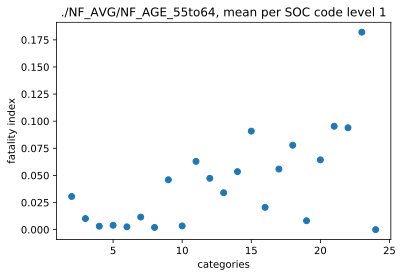

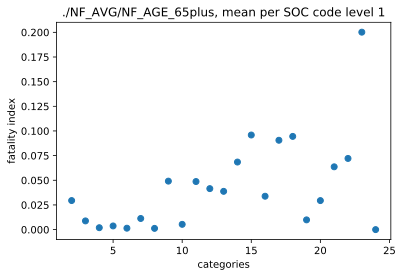

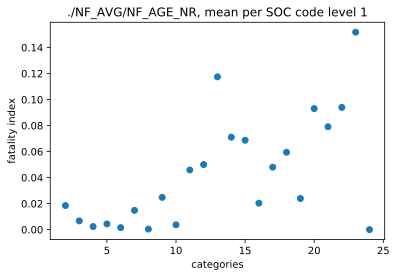

[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_AGE

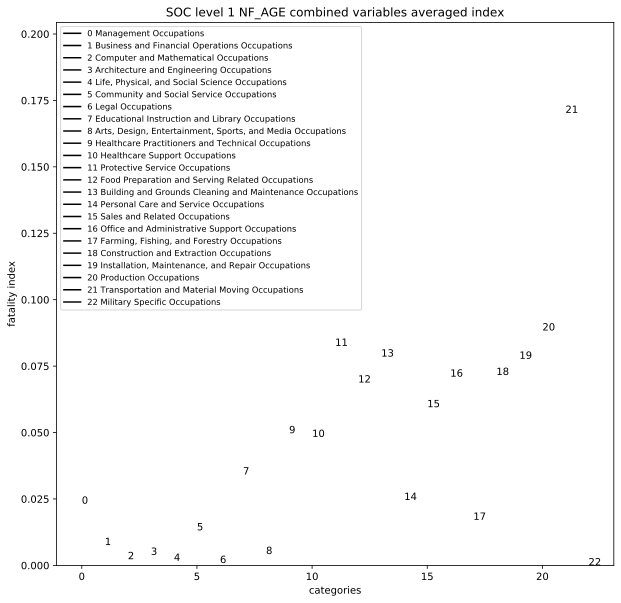

12
[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_

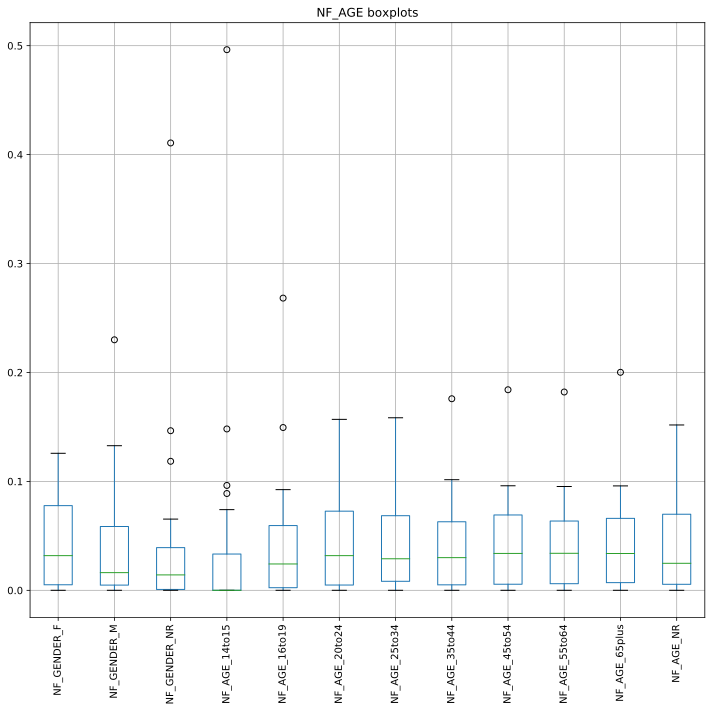

SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_LOS_1to5yr_all.csv
NF_LOS_3to11mos_all.csv
NF_LOS_5plus_all.csv
NF_LOS_ltg3mos_all.csv
NF_LOS_NR_all.csv
dict_keys(['NF_LOS_1to5yr', 'NF_LOS_3to11mos', 'NF_LOS_5plus', 'NF_LOS_ltg3mos', 'NF_LOS_NR'])
['00', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55']
NF_LOS_1to5yr [0.02191603 0.00678763 0.00202493 0.00310626 0.00232798 0.0131999
 0.00084716 0.02701279 0.00646048 0.06010035 0.06399523 0.05604017
 0.07712281 0.07345178 0.03047376 0.05611593 0.06522465 0.01211167
 0.07591406 0.08652081 0.09064643 0.16859919 0.        ]
 
NF_LOS_3to11mos [0.01502805 0.00523802 0.00122456 0.00220548 0.00184004 0.0112518
 0.00075653 0.01982369 0.00641128 0.04423786 0.0693765  0.02933162
 0.09486777 0.06839558 0.03405674 0.05888123 0.06143933 0.01674627
 0.08686007 0.07370412 0.10251643 0.19580702 0.        ]
 
NF_LOS_5plus [0.02916445 0.00846029 0.00323147

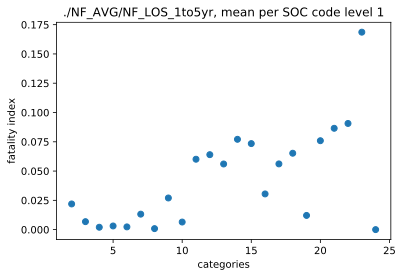

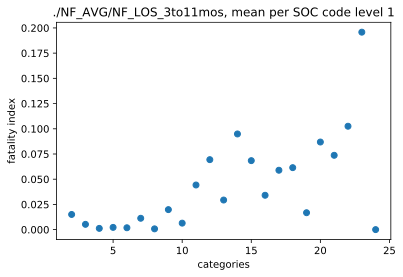

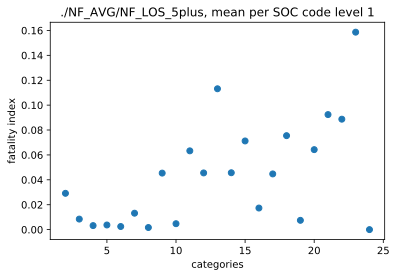

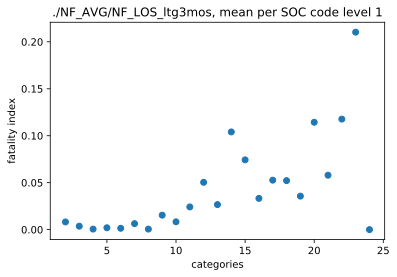

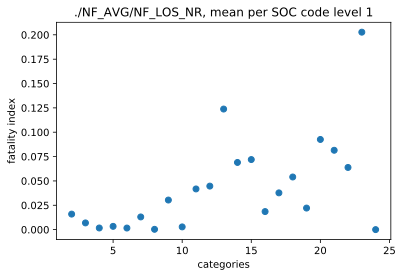

[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_AGE

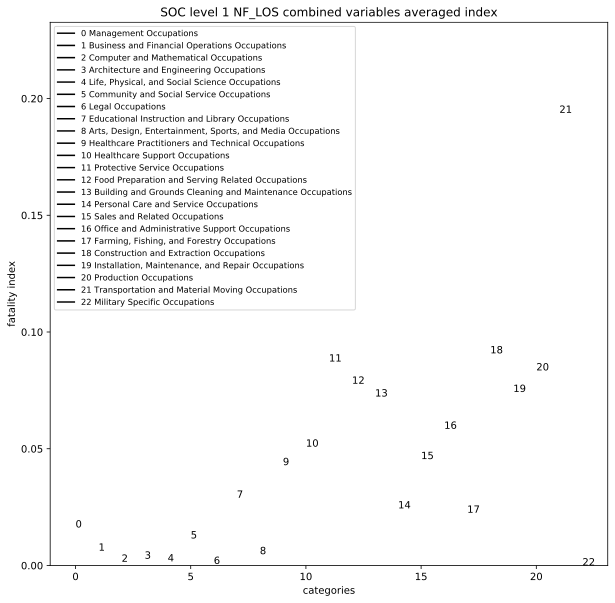

17
[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_

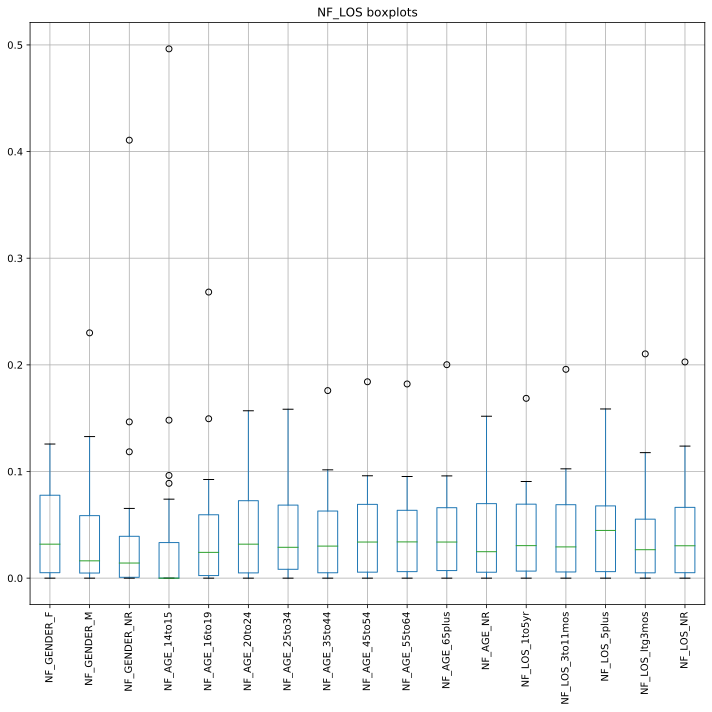

SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_RAX_AmericanIndian_AlaskaNative_all.csv
NF_RBX_Asian_all.csv
NF_RCX_Black_AfricanAmerican_all.csv
NF_RDX_Hispanic_all.csv
NF_REX_Hawaiian_all.csv
NF_RFX_White_all.csv
NF_RGX_NR_all.csv
NF_RHX_Multi_all.csv
NF_RIX_Hispanic_all.csv
dict_keys(['NF_RAX_AmericanIndian_AlaskaNative', 'NF_RBX_Asian', 'NF_RCX_Black_AfricanAmerican', 'NF_RDX_Hispanic', 'NF_REX_Hawaiian', 'NF_RFX_White', 'NF_RGX_NR', 'NF_RHX_Multi', 'NF_RIX_Hispanic'])
['00', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55']
NF_RAX_AmericanIndian_AlaskaNative [0.02764749 0.00543076 0.         0.00296223 0.         0.02024192
 0.00049371 0.0422118  0.00098741 0.03678104 0.0562824  0.05875093
 0.09331029 0.09750679 0.02517897 0.04665515 0.0614663  0.01308319
 0.11799556 0.08368304 0.08862009 0.12071094 0.        ]
 
NF_RBX_Asian [0.03738551 0.00974188 0.00466278 0.00541216 0.00574521 

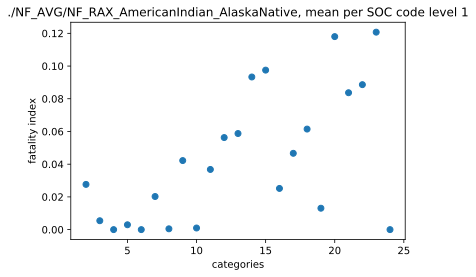

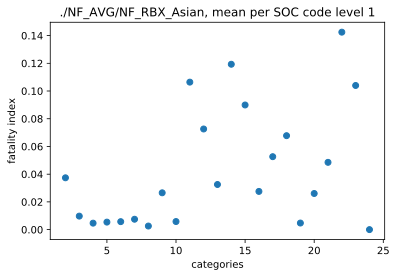

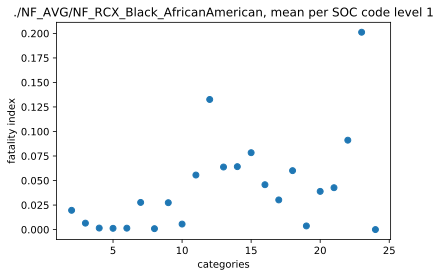

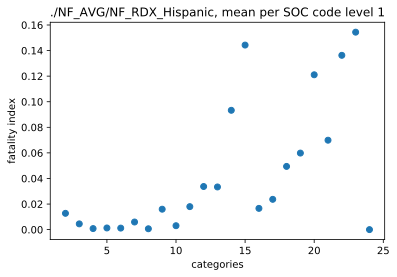

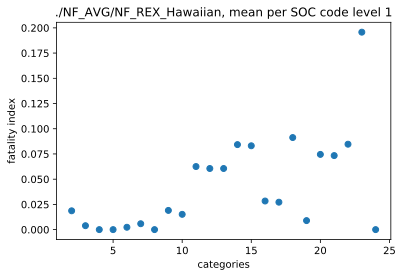

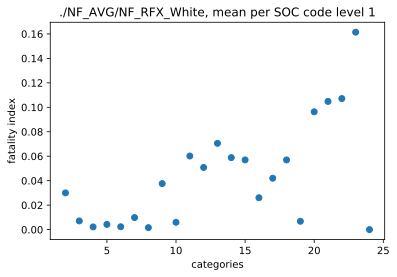

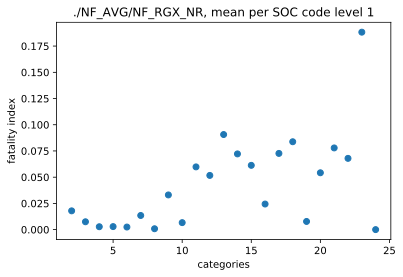

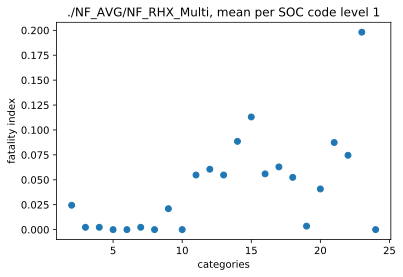

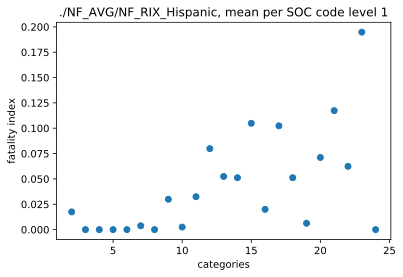

[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_AGE

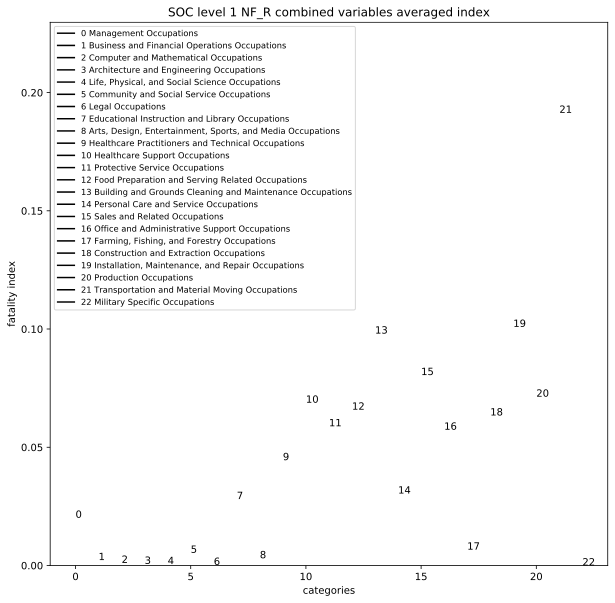

26
[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_

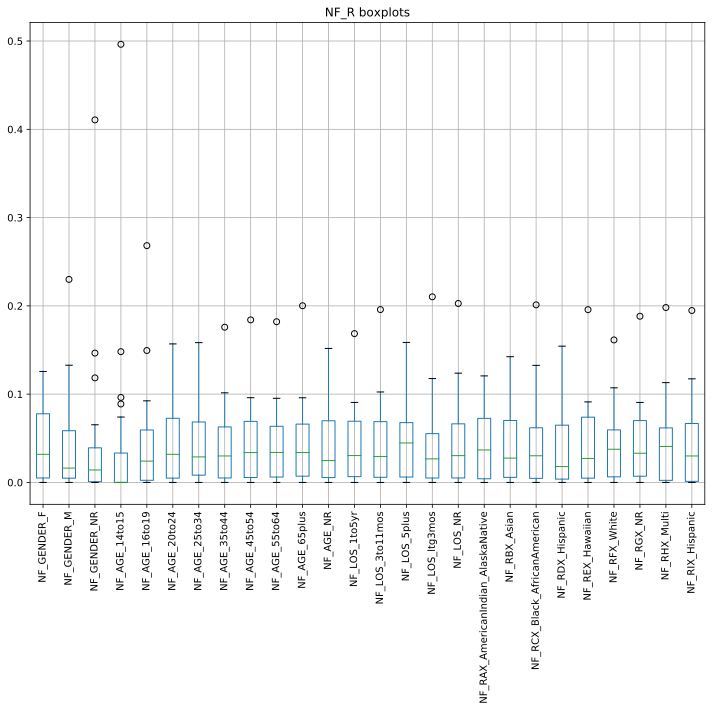

SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
NF_E1X_In_UnIn_Animal_all.csv
NF_E2X_Transportion_all.csv
NF_E3X_Fire_Explosion_all.csv
NF_E4X_Falls_Slip_Trip_all.csv
NF_E5X_Exposure_all.csv
NF_E6X_Contact_all.csv
NF_E7X_Overex_all.csv
NF_EXX_All_other_all.csv
dict_keys(['NF_E1X_In_UnIn_Animal', 'NF_E2X_Transportion', 'NF_E3X_Fire_Explosion', 'NF_E4X_Falls_Slip_Trip', 'NF_E5X_Exposure', 'NF_E6X_Contact', 'NF_E7X_Overex', 'NF_EXX_All_other'])
['00', '11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53', '55']
NF_E1X_In_UnIn_Animal [2.06645321e-02 2.94040774e-03 6.04417146e-04 1.14349190e-03
 2.66270256e-03 5.17185050e-02 1.96027182e-04 1.16146106e-01
 8.85389441e-03 1.25375719e-01 1.48572269e-01 2.71252614e-01
 1.27254313e-02 2.00601150e-02 8.65460010e-02 1.92106639e-02
 1.88839519e-02 2.10239153e-02 9.86670152e-03 1.55678254e-02
 7.92276529e-03 3.80619446e-02 0.00000000e+00]
 
NF_E2X_Transportion [0.

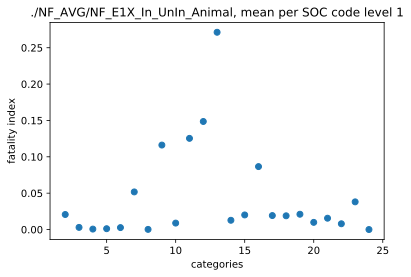

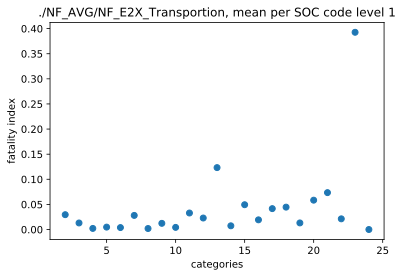

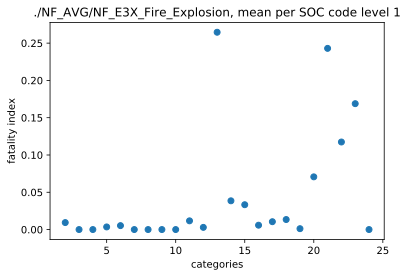

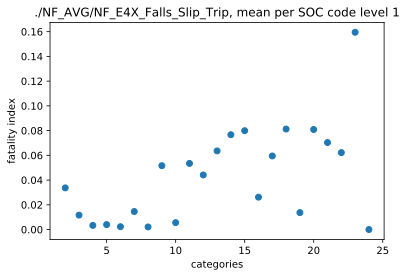

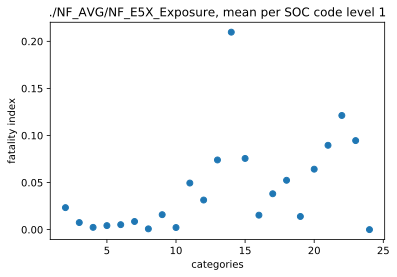

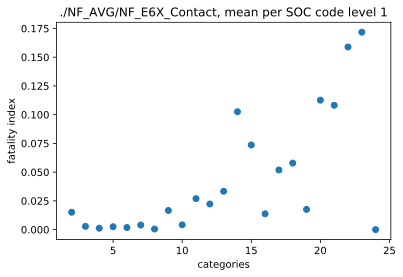

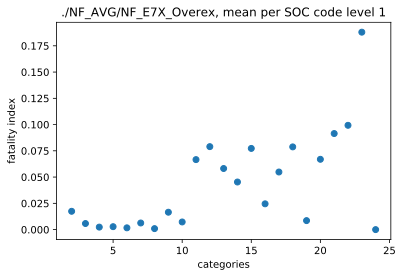

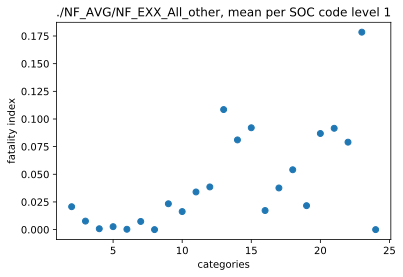

[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_AGE

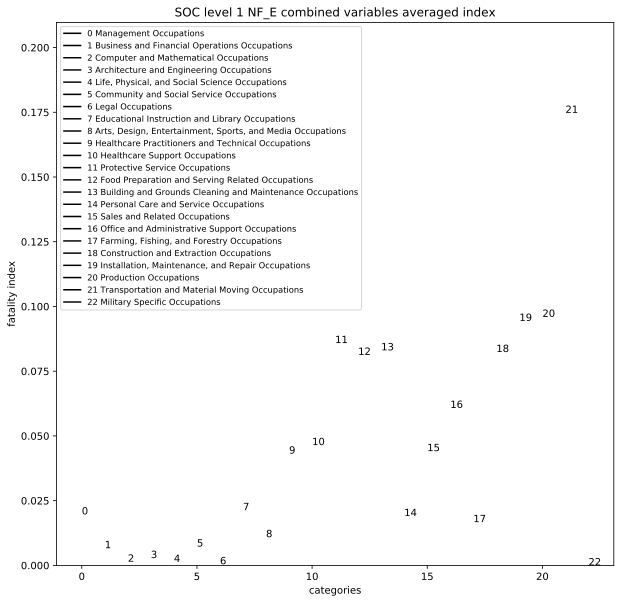

34
[['NF_GENDER_F', array([0.03186545, 0.01239274, 0.00214587, 0.00108275, 0.00268724,
       0.02325112, 0.00247687, 0.07075756, 0.00524265, 0.11200592,
       0.12578156, 0.03373361, 0.10521208, 0.07524004, 0.05146999,
       0.08028634, 0.10105779, 0.00771671, 0.00497617, 0.00735766,
       0.06000017, 0.0832597 , 0.        ])], ['NF_GENDER_M', array([0.01625218, 0.00344145, 0.00229609, 0.00441626, 0.00192269,
       0.00522231, 0.00029262, 0.00765664, 0.00630842, 0.01875831,
       0.01132249, 0.09813243, 0.04746936, 0.06973555, 0.00954522,
       0.03305908, 0.04587879, 0.01701874, 0.12254032, 0.13276951,
       0.11597697, 0.22998458, 0.        ])], ['NF_GENDER_NR', array([0.00571895, 0.00054466, 0.        , 0.        , 0.        ,
       0.00490196, 0.        , 0.00490196, 0.00108932, 0.02342048,
       0.02641612, 0.06535948, 0.02832244, 0.03894336, 0.00844227,
       0.01824619, 0.03948802, 0.01416122, 0.14651416, 0.11846405,
       0.04438998, 0.41067538, 0.        ])], ['NF_

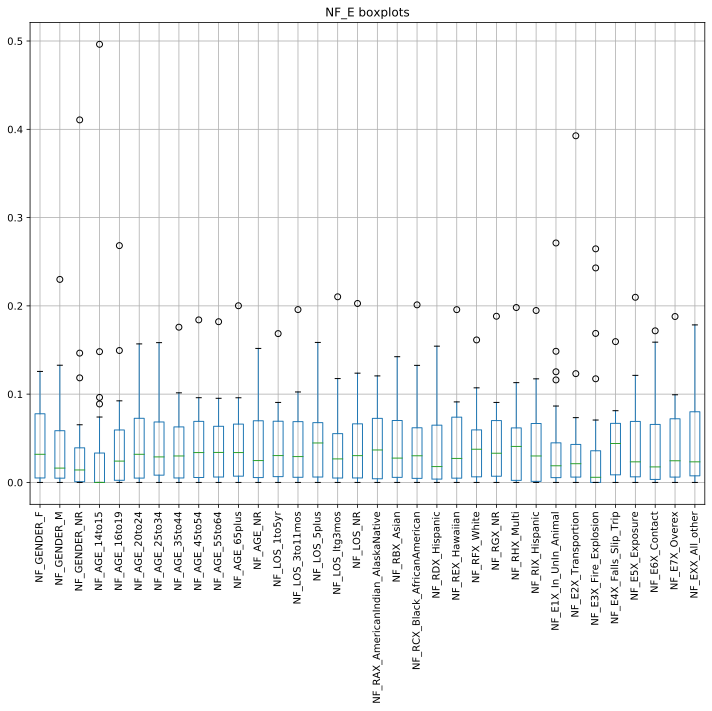

In [3]:
%run ./NF_GENDER_data_count.ipynb
%run ./NF_AGE_data_count.ipynb
%run ./NF_LOS_data_count.ipynb
%run ./NF_R_data_count.ipynb
%run ./NF_EX_data_count.ipynb

['NF_GENDER_F', 'NF_GENDER_M', 'NF_GENDER_NR', 'NF_AGE_14to15', 'NF_AGE_16to19', 'NF_AGE_20to24', 'NF_AGE_25to34', 'NF_AGE_35to44', 'NF_AGE_45to54', 'NF_AGE_55to64', 'NF_AGE_65plus', 'NF_AGE_NR', 'NF_LOS_1to5yr', 'NF_LOS_3to11mos', 'NF_LOS_5plus', 'NF_LOS_ltg3mos', 'NF_LOS_NR', 'NF_RAX_AmericanIndian_AlaskaNative', 'NF_RBX_Asian', 'NF_RCX_Black_AfricanAmerican', 'NF_RDX_Hispanic', 'NF_REX_Hawaiian', 'NF_RFX_White', 'NF_RGX_NR', 'NF_RHX_Multi', 'NF_RIX_Hispanic', 'NF_E1X_In_UnIn_Animal', 'NF_E2X_Transportion', 'NF_E3X_Fire_Explosion', 'NF_E4X_Falls_Slip_Trip', 'NF_E5X_Exposure', 'NF_E6X_Contact', 'NF_E7X_Overex', 'NF_EXX_All_other']


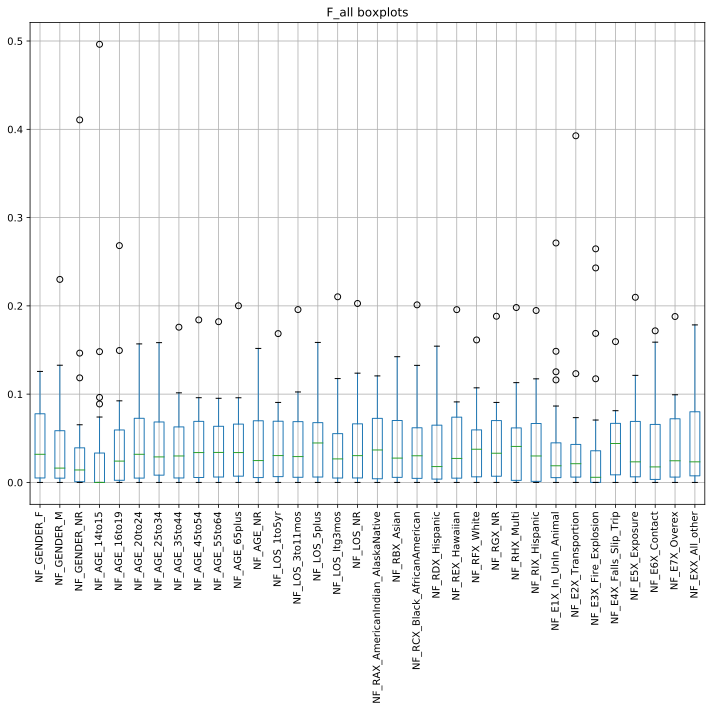

In [4]:
# Creating pandas dataframe from numpy array
#pd_data_df = pd.DataFrame({ global_y_soc1[0][0] : global_y_soc1[0][1] })
pd_df = pd.DataFrame()

for index in range(0,len(global_y_soc1)):
    pd_df[global_y_soc1[index][0]] = global_y_soc1[index][1]
    #print(global_y_soc1[index][0])
    #print(type(global_y_soc1[index][0]))

    
# Create the list of elemnts
#
#print(pd_df)
print(list(pd_df.columns))
avg_list = list(pd_df.columns)

title = "F_all boxplots"
plt.figure(title,figsize=(10, 10))
plt.title(title)
#pd_df.boxplot(['F_GENDER_F', 'F_GENDER_M', 'F_AGE_14to15', 'F_AGE_16to19', 'F_AGE_20to24', 'F_AGE_25to34', 'F_AGE_35to44', 'F_AGE_45to54', 'F_AGE_55to64', 'F_AGE_65plus', 'F_AGE_NR', 'NF_E1X_In_UnIn_Animal', 'NF_E2X_Transportion', 'NF_E3X_Fire_Explosion', 'NF_E4X_Falls_Slip_Trip', 'NF_E5X_Exposure', 'NF_E6X_Contact', 'NF_E7X_Overex', 'NF_EXX_All_other'])
pd_df.boxplot(avg_list)
plt.xticks(rotation = 90)
plt.ylim=((0,0.4))
plt.tight_layout()

save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
plt.savefig(save_title, dpi=100, bbox_inches='tight')

# NF_RIX_Hispanic + NF_GENDER_M + NF_GENDER_NR + NF_AGE_14to15 + NF_AGE_16to19 + NF_AGE_20to24 + NF_AGE_25to34 + NF_AGE_35to44 + NF_AGE_45to54 + NF_AGE_55to64 + NF_AGE_65plus + NF_AGE_NR + NF_LOS_1to5yr + NF_LOS_3to11mos + NF_LOS_5plus + NF_LOS_NR + NF_LOS_ltg3mos + NF_RAX_AmericanIndian_AlaskaNative + NF_RBX_Asian + NF_RCX_Black_AfricanAmerican + NF_RDX_Hispanic + NF_REX_Hawaiian + NF_RFX_White + NF_RGX_NR + NF_RHX_Multi + NF_RIX_Hispanic

#NF_EXX_All_other + NF_GENDER_M + NF_GENDER_NR + NF_AGE_14to15 + NF_AGE_16to19 + NF_AGE_20to24 + NF_AGE_25to34 + NF_AGE_35to44 + NF_AGE_45to54 + NF_AGE_55to64 + NF_AGE_65plus + NF_AGE_NR + NF_LOS_1to5yr + NF_LOS_3to11mos + NF_LOS_5plus + NF_LOS_NR + NF_LOS_ltg3mos + NF_RAX_AmericanIndian_AlaskaNative + NF_RBX_Asian + NF_RCX_Black_AfricanAmerican + NF_RDX_Hispanic + NF_REX_Hawaiian + NF_RFX_White + NF_RGX_NR + NF_RHX_Multi + NF_RIX_Hispanic + NF_E1X_In_UnIn_Animal + NF_E2X_Transportion + NF_E3X_Fire_Explosion + NF_E4X_Falls_Slip_Trip + NF_E5X_Exposure + NF_E6X_Contact + NF_E7X_Overex + NF_EXX_All_other

In [5]:
#print(str(global_y_soc1[index][0]),end='')
#for index in range(1,len(global_y_soc1)):
#    print(" +", str(global_y_soc1[index][0]),end='')

In [6]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [7]:
import dataframe_image as dfi

In [8]:
#df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)
df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
df_corr.to_excel(save_file)

,NF_GENDER_F,NF_GENDER_M,NF_GENDER_NR,NF_AGE_14to15,NF_AGE_16to19,NF_AGE_20to24,NF_AGE_25to34,NF_AGE_35to44,NF_AGE_45to54,NF_AGE_55to64,NF_AGE_65plus,NF_AGE_NR,NF_LOS_1to5yr,NF_LOS_3to11mos,NF_LOS_5plus,NF_LOS_ltg3mos,NF_LOS_NR,NF_RAX_AmericanIndian_AlaskaNative,NF_RBX_Asian,NF_RCX_Black_AfricanAmerican,NF_RDX_Hispanic,NF_REX_Hawaiian,NF_RFX_White,NF_RGX_NR,NF_RHX_Multi,NF_RIX_Hispanic,NF_E1X_In_UnIn_Animal,NF_E2X_Transportion,NF_E3X_Fire_Explosion,NF_E4X_Falls_Slip_Trip,NF_E5X_Exposure,NF_E6X_Contact,NF_E7X_Overex,NF_EXX_All_other
NF_GENDER_F,1.000000,0.190311,0.190005,0.354989,0.555706,0.624303,0.539486,0.474840,0.498118,0.558735,0.642630,0.449778,0.592672,0.563241,0.496533,0.446570,0.397828,0.510397,0.784801,0.685871,0.348865,0.584163,0.453805,0.591324,0.605066,0.504532,0.379045,0.239174,-0.003399,0.601030,0.504592,0.359804,0.573357,0.401911
NF_GENDER_M,0.190311,1.000000,0.902550,0.126524,0.489068,0.786084,0.910105,0.940300,0.940334,0.877301,0.772353,0.923848,0.896866,0.871716,0.900311,0.879250,0.934934,0.842979,0.546309,0.728089,0.825959,0.878236,0.941404,0.868698,0.827237,0.853590,0.074512,0.829007,0.797319,0.864228,0.615358,0.904471,0.885770,0.945642
NF_GENDER_NR,0.190005,0.902550,1.000000,0.067254,0.440566,0.705655,0.809135,0.848751,0.862899,0.822433,0.773440,0.784231,0.824778,0.839403,0.782060,0.840070,0.886735,0.686602,0.389803,0.753101,0.672894,0.842653,0.826268,0.833799,0.791448,0.813691,0.035809,0.950983,0.594108,0.813990,0.402946,0.744067,0.831986,0.839765
NF_AGE_14to15,0.354989,0.126524,0.067254,1.000000,0.821586,0.493301,0.270395,0.184889,0.163596,0.134083,0.233704,0.271342,0.272065,0.319261,0.136889,0.346472,0.259363,0.345506,0.414323,0.224131,0.320772,0.302272,0.161686,0.256365,0.358068,0.132993,0.051655,0.052869,0.105368,0.287414,0.731185,0.291941,0.112371,0.319524
NF_AGE_16to19,0.555706,0.489068,0.440566,0.821586,1.000000,0.864003,0.627747,0.540212,0.552646,0.554007,0.627615,0.591226,0.668955,0.738072,0.466167,0.745657,0.564793,0.678623,0.673269,0.561255,0.621271,0.654777,0.554055,0.628594,0.677465,0.559830,-0.064619,0.368255,0.240704,0.658212,0.864449,0.684032,0.537539,0.615616
NF_AGE_20to24,0.624303,0.786084,0.705655,0.493301,0.864003,1.000000,0.903813,0.848883,0.864024,0.851416,0.842193,0.857993,0.932576,0.960023,0.785268,0.938565,0.817805,0.887886,0.805099,0.831024,0.817943,0.905186,0.864997,0.876353,0.880553,0.836536,0.062553,0.621228,0.488918,0.887535,0.831906,0.900803,0.871572,0.852240
NF_AGE_25to34,0.539486,0.910105,0.809135,0.270395,0.627747,0.903813,1.000000,0.988378,0.967580,0.902747,0.836750,0.983350,0.969972,0.929306,0.956941,0.894827,0.956768,0.904557,0.747491,0.874134,0.803908,0.950357,0.967644,0.953147,0.890463,0.873689,0.320273,0.768099,0.719618,0.937624,0.729907,0.880367,0.949129,0.957386
NF_AGE_35to44,0.474840,0.940300,0.848751,0.184889,0.540212,0.848883,0.988378,1.000000,0.984709,0.921418,0.843115,0.980768,0.962580,0.909473,0.979192,0.873312,0.972976,0.885538,0.703743,0.863438,0.797505,0.945583,0.975184,0.954220,0.893441,0.886948,0.316994,0.819003,0.760534,0.937178,0.671769,0.867807,0.955484,0.967476
NF_AGE_45to54,0.498118,0.940334,0.862899,0.163596,0.552646,0.864024,0.967580,0.984709,1.000000,0.972553,0.901768,0.949007,0.981692,0.941564,0.965131,0.902079,0.949095,0.898544,0.734147,0.876803,0.834338,0.964847,0.978020,0.956339,0.932660,0.926411,0.197594,0.823281,0.693673,0.958599,0.662556,0.896877,0.978400,0.957720
NF_AGE_55to64,0.558735,0.877301,0.822433,0.134083,0.554007,0.851416,0.902747,0.921418,0.972553,1.000000,0.944258,0.863872,0.967636,0.939012,0.910877,0.886790,0.868179,0.872636,0.767750,0.850248,0.821826,0.948680,0.940813,0.927893,0.935872,0.929447,0.063776,0.772771,0.561409,0.952811,0.633395,0.886256,0.967182,0.890376


In [9]:
import dataframe_image as dfi

In [10]:

df = pd_df.corr(method='pearson')

ranges = []
#Build up range
last_loc = 0
for i in range(0,len(avg_list)-1):
    loc = avg_list[i].find("F_")  + 2
    #print(avg_list[i][loc], avg_list[i+1][loc] )
    if (avg_list[i][loc] != avg_list[i+1][loc] ):
        #print(last_loc,i+1)
        ranges.append([last_loc,i+1])
        last_loc = i+1

print(ranges)   
#ranges = [ [0,2],[2,11],[11,20],[20,29],[29,34], [0,34]]

for r in ranges:
    df_style = df[df.columns[r[0]:r[1]]].style.applymap(color_corr_green)
    dfi_fname = "../PLOTS/" + desired_file_output + "F_all_pearson_corr_"+str(r[0])+"_"+str(r[1])+".png"
    dfi.export(df_style, dfi_fname, max_cols=-1)
    
    save_file = "../PLOTS/" + desired_file_output + "F_NF_all_pearson_corr_" + str(r[0]) + "_" + str(r[1]) + ".xlsx"
    df_style.to_excel(save_file)

## Average data

In [11]:
#'NF_GENDER_F', 'NF_GENDER_M', 'NF_GENDER_NR' 
#'NF_AGE_14to15', 'NF_AGE_16to19',  'NF_AGE_20to24', 'NF_AGE_25to34', 'NF_AGE_35to44', 'NF_AGE_45to54', 'NF_AGE_55to64', 'NF_AGE_65plus', 'NF_AGE_NR'
#'NF_LOS_1to5yr', 'NF_LOS_3to11mos', 'NF_LOS_5plus','NF_LOS_NR', 'NF_LOS_ltg3mos'
#
#NF_RAX_AmericanIndian_AlaskaNative + NF_RBX_Asian + NF_RCX_Black_AfricanAmerican + NF_RDX_Hispanic + NF_REX_Hawaiian + NF_RFX_White + NF_RGX_NR + NF_RHX_Multi + NF_RIX_Hispanic 
#NF_E1X_In_UnIn_Animal + NF_E2X_Transportion + NF_E3X_Fire_Explosion + NF_E4X_Falls_Slip_Trip + NF_E5X_Exposure + NF_E6X_Contact + NF_E7X_Overex + NF_EXX_All_other

#avg_list = ['NF_GENDER_M','NF_GENDER_F']
#avg_list = ['NF_GENDER_F', 'NF_GENDER_M', 'NF_GENDER_NR', 'NF_AGE_14to15', 'NF_AGE_16to19', 'NF_AGE_20to24', 'NF_AGE_25to34', 'NF_AGE_35to44', 'NF_AGE_45to54', 'NF_AGE_55to64', 'NF_AGE_65plus', 'NF_AGE_NR', 'NF_LOS_1to5yr', 'NF_LOS_3to11mos', 'NF_LOS_5plus','NF_LOS_NR', 'NF_LOS_ltg3mos']

# Create plot data
x = np.zeros(23)
y = np.zeros(23)
count = 0.0

for to_avg in avg_list:
    for index in range(0,len(global_y_soc1)):
        if (str(global_y_soc1[index][0]).find(to_avg)>=0):
            print(global_y_soc1[index][0])
            y = (y + global_y_soc1[index][1]) / 2
    
for index in range(0,23):
    x[index] = count
    count=count+1.0
        
data = np.array([x,y])

print(data)

NF_GENDER_F
NF_GENDER_M
NF_GENDER_NR
NF_AGE_14to15
NF_AGE_16to19
NF_AGE_20to24
NF_AGE_25to34
NF_AGE_35to44
NF_AGE_45to54
NF_AGE_55to64
NF_AGE_65plus
NF_AGE_NR
NF_LOS_1to5yr
NF_LOS_3to11mos
NF_LOS_5plus
NF_LOS_ltg3mos
NF_LOS_NR
NF_RAX_AmericanIndian_AlaskaNative
NF_RBX_Asian
NF_RCX_Black_AfricanAmerican
NF_RDX_Hispanic
NF_REX_Hawaiian
NF_RFX_White
NF_RGX_NR
NF_RHX_Multi
NF_RIX_Hispanic
NF_E1X_In_UnIn_Animal
NF_E2X_Transportion
NF_E3X_Fire_Explosion
NF_E4X_Falls_Slip_Trip
NF_E5X_Exposure
NF_E6X_Contact
NF_E7X_Overex
NF_EXX_All_other
[[0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01 1.10000000e+01
  1.20000000e+01 1.30000000e+01 1.40000000e+01 1.50000000e+01
  1.60000000e+01 1.70000000e+01 1.80000000e+01 1.90000000e+01
  2.00000000e+01 2.10000000e+01 2.20000000e+01]
 [1.96488636e-02 6.59882314e-03 1.41928822e-03 2.83440346e-03
  1.33283322e-03 7.19560888e-03 4.32185368e

## Create PANDAS dataset


## Fix Outliers

In [12]:
# Fix outliers

for index in range(0,len(y)):
    if ((index==6) or (index==22)):
        # Mask outliers
        y[index] = y[index-1]
    #else:
    #    y[index] = y[index]
        
data = np.array([x,y])
print(data)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01 1.10000000e+01
  1.20000000e+01 1.30000000e+01 1.40000000e+01 1.50000000e+01
  1.60000000e+01 1.70000000e+01 1.80000000e+01 1.90000000e+01
  2.00000000e+01 2.10000000e+01 2.20000000e+01]
 [1.96488636e-02 6.59882314e-03 1.41928822e-03 2.83440346e-03
  1.33283322e-03 7.19560888e-03 7.19560888e-03 2.11709499e-02
  1.08849497e-02 4.29112920e-02 4.62359059e-02 8.59704760e-02
  8.11547710e-02 8.31423339e-02 1.89537945e-02 4.41281095e-02
  6.06420203e-02 1.66911784e-02 8.26385889e-02 9.47961564e-02
  9.60331984e-02 1.75184269e-01 1.75184269e-01]]


In [13]:
# Creating pandas dataframe from numpy array
pd_data = pd.DataFrame({'Column1': data[0, :], 'Column2': data[1, :]})
print(pd_data)

    Column1   Column2
0       0.0  0.019649
1       1.0  0.006599
2       2.0  0.001419
3       3.0  0.002834
4       4.0  0.001333
5       5.0  0.007196
6       6.0  0.007196
7       7.0  0.021171
8       8.0  0.010885
9       9.0  0.042911
10     10.0  0.046236
11     11.0  0.085970
12     12.0  0.081155
13     13.0  0.083142
14     14.0  0.018954
15     15.0  0.044128
16     16.0  0.060642
17     17.0  0.016691
18     18.0  0.082639
19     19.0  0.094796
20     20.0  0.096033
21     21.0  0.175184
22     22.0  0.175184


## Perform regression

In [14]:
X = pd_data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = pd_data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
results=linear_regressor.fit(X, Y)  # perform linear regression

r_sq = linear_regressor.score(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
print('coefficient of determination:', r_sq)
#print(Y_pred)

coefficient of determination: 0.6366283289989256


In [15]:
new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)


intercept: [-0.01501015]
slope: [[0.00603629]]


## Plot prediction

TypeError: 'tuple' object is not callable

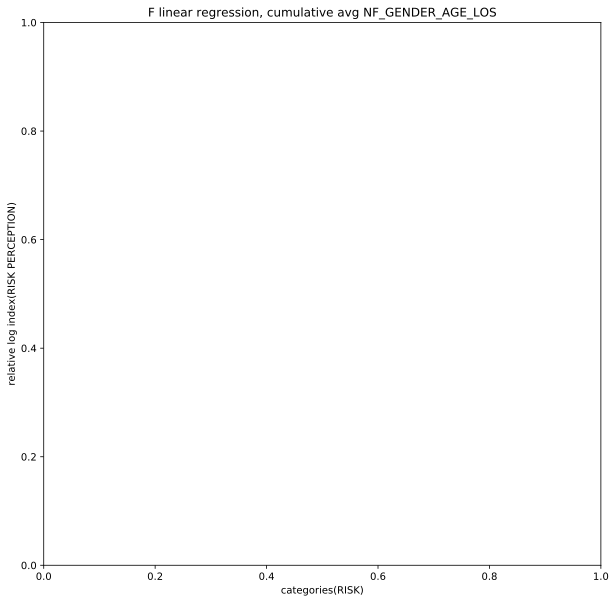

In [16]:
title = "F linear regression, cumulative avg NF_GENDER_AGE_LOS"
plt.figure(title, figsize=(10, 10))
plt.title(title)
plt.xlabel('categories(RISK)')
plt.ylabel('relative log index(RISK PERCEPTION)')
plt.ylim(0,12)

for index in range(0,23):  
    plabel = str(index) + " " + str(soc_labels[index])
    plt.plot(x[index],y[index],'.',label=plabel, color="black")
    #plt.text(x[index],y[index],str(index))
    #plt.scatter(X[index], Y[index])
    plt.plot(X[index], Y_pred[index],'o', color="red")
    plt.text(X[index], Y[index],str(index))
    
plt.legend(loc="center", bbox_to_anchor=(0.72, 0.3), ncol= 1, fontsize="small")
plt.show()

save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
plt.savefig(save_title, dpi=100, bbox_inches='tight')


In [ ]:
#print(Y_pred)
yp = Y_pred.tolist()
print(yp[0],yp[-1])
yp1 = float(yp[0][0])
yp2 = float(yp[-1][0])
print(math.pow(10,-1*yp1), math.pow(10,-1*yp2) )

In [ ]:
print(global_soc1_empty)

In [ ]:
print(no_data_threshold)